# I. les différentes classes

Le programme est constitué de différentes classes qui s'organise suivant le diagramme UML suivant :

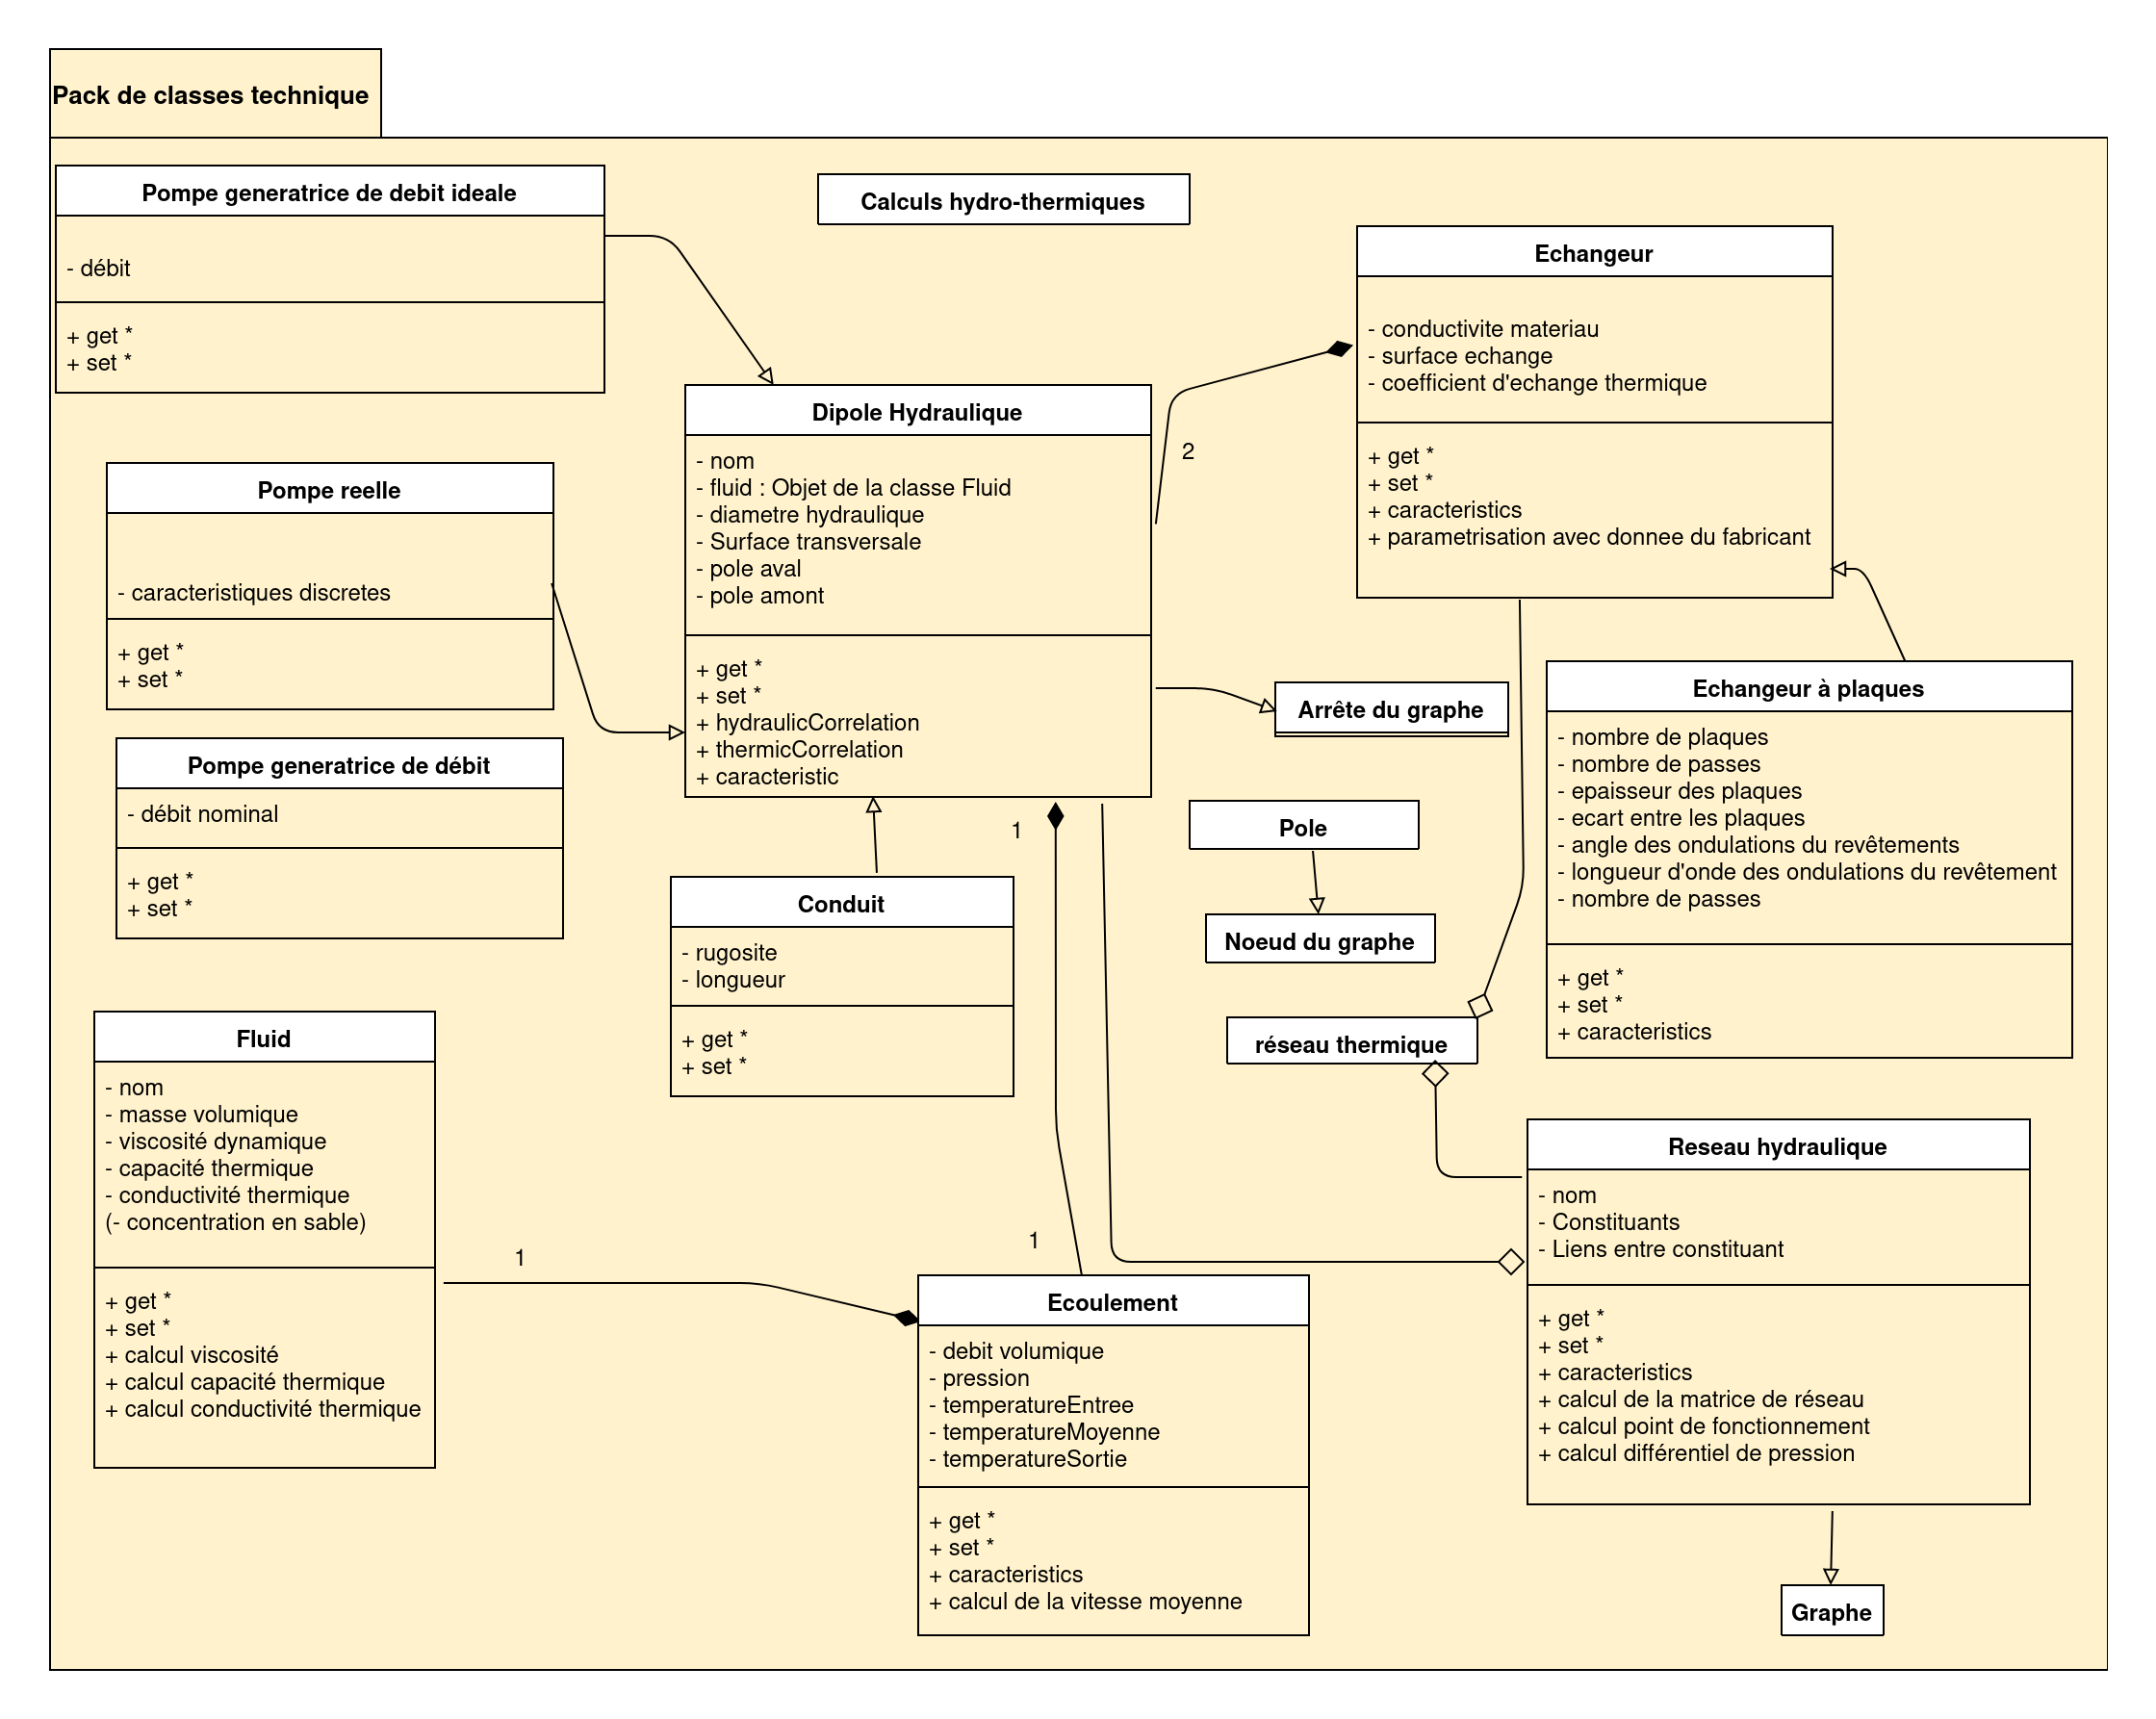

**Attention !** Le code est écrit avec des variables en langue anglaise.

On commence par ajouter à sys.path le module comportant toutes les classes :

In [ ]:
import sys
sys.path.append("./Classes")

## I.1 La classe Fluid

La classe Fluid contient les attributs suivants :

|   	|   variable	|   type python	| 
|---	|---	|---	|
|   nom de l'objet	|   **name** 	|   	|  
|   masse volumique	|   **volumetricMass** en $kg/m^3$	|   float	|   
|   capacité thermique	|   **thermicCapacity** en $J/K$	|   float	|   
|   conductivité thermique 	|   **thermicConductivity** en $W/m/K$	|   float	|   
|   salinité (pour la classe **SeaWater**)	|  **salinity** en $ups$ ($g/kg$) 	|   float	|   



Ces caractéristiques sont par défauts égales à celle de l'eau douce à 20°C et à pression atmosphérique. Et la salinité est par défaut égale à 0 lors de la création d'un objet eau de mer.



In [ ]:
from FluidFolder.Fluid import Fluid, SeaWater #On importe la classe Fluid à partir de laquelle on va créer des instances que l'on utilisera par la suite


In [ ]:
# On crée l'objet eau à partir des attributs par défaut de la classe fluid
eau = Fluid()
# On crée un fluide quelconque de la première manière : en explicitant les variables 
fluideQuelconque1 = Fluid(name = 'quelconque1', volumetricMass = 1200.0, thermicCapacity = 3000.0, thermicConductivity = 0.5)
# On crée un fluide quelconde de la seconde manière : sans expliciter les variables
fluideQuelconque2 = Fluid('quelconque2', 1300.0,2500.0,0.5)
# On crée dun objet eau de mer avec une salinité fixée
eauDeMer = SeaWater(salinity = 10.0)

Pour n'importe quel objet, chacun des attributs peut être lu (avec les méthodes get) et modifier (avec les méthodes set)

In [4]:
#On accède par exemple au nom des objets créées précédemment
(nameEau, nameQuelconque1, nameQuelconque2, nameEauDeMer) = (eau.name, fluideQuelconque1.name, fluideQuelconque2.name, eauDeMer.name)
#affichage des variables :
print('Les noms des différents fluides créés :')
print(nameEau, nameQuelconque1, nameQuelconque2, nameEauDeMer)

#On modifie les attributs des fluides :
fluideQuelconque1.name = 'changement de nom'
print('\n' + 'nom du fluide quelconque 1 après le changement de nom :')
print(fluideQuelconque1.name)

Les noms des différents fluides créés :
eau quelconque1 quelconque2 eau de mer

nom du fluide quelconque 1 après le changement de nom :
changement de nom


Les variables des fluides sont des fonctions des variables d'états : **pression**, **température** et **salinité**. Ainsi, lorsqu'il y a une forte évolution de ces variables (lors d'un échange de chaleur ou de diminutions de pressions dans le circuit par exemple), ces variables doivent pouvoir évoluer. 

Pour ce faire la classe fluid dispose de méthodes capables de calculer les différentes variables à partir de la pression, de la température et de la salinité ces méthodes sont :
- **volumetricMassEvolution**(self, temperature, pressure, salinity (pour l'eau de mer), modify = True ou False)
- **dynamicViscosityEvolution**(self, temperature, pressure, salinity (pour l'eau de mer), modify = True ou False)
- **thermicCapacityEvolution**(self, temperature, pressure, salinity (pour l'eau de mer), modify = True ou False)
- **thermicConductivityEvolution**(self, temperature, pressure, salinity (pour l'eau de mer), modify = True ou False)

Si le paramètre **modifiy** est vrai cela signifie que l'appel de cette méthode modifiera les attributs correspondants.

Il est important de préciser que ces fonctions ne sont par défaut pas définies, afin de les définir pour un objet donnée, il est possible d'assigner à cette méthode une fonction dépendant des paramètres respectifs : température, pression (et salinité pour l'eau de mer) à l'aide des méthodes :
- **volumetricMassEvolutionDefinition**(self, dependancy)
- **dynamicViscosityEvolutionDefinition**(self, dependancy)
- **thermicCapacityEvolutionDefinition**(self, dependancy)
- **thermicConductivityEvolutionDefinition**(self, dependancy)

où dans chacun des cas dependancy est la fonction souhaitée. Par exemple, la conductivité thermique $k$ peut être approchée par la formule suivante avec une précision de l'ordre de 0.5%: 
$$k = 0.5711\times(1+3 \times 10^{-3}\times T-10.25 \times 10^{-6} T^2 + 6.53\times 10^{-6}p -0.29 \times 10^{-3}S)$$
avec T en degré Celcius, p en dbar et S en g/kg.

Le code suivant permet de mettre en évidence comment ajouter cette relation dans l'objet eau de mer créé précédemment (la pression est donnée en Pascal dans le code pour être cohérent avec le reste du code):




In [5]:
def thermicConductivity(temperature, pressure, salinity):
    return 0.5711 * (1 + 3 * 10 ** (-3) * temperature - 10.25 * 10 ** (-6) * temperature ** 2 + 6.53 * 10 ** (-6) * (pressure / 10 ** 4) - 0.29 * 10 **(-3)*salinity)

# Avant la redéfinition de la fonction :
print(eauDeMer.thermicConductivityEvolution(10.0,10 ** 4, 10.0))
#reféfinition de la fonction à l'aide de la corrélation définie précédemment :
eauDeMer.thermicConductivityEvolutionDefinition(thermicConductivity)
#après la redéfinition :
print(eauDeMer.thermicConductivityEvolution(10.0, 10 ** 4, 10.0))
#vérifions que la conductivité thermique de l'eau de mer a bien été modifiée :
print(eauDeMer.thermicConductivity)



None
0.5859951617830002
0.5859951617830002


## I.2 La classe Dipole
Cette classe permet de définir le dipole dans lequel vient accueillir l'écoulement. Celui-ci peut prendre par exemple la forme de :
- une pompe
- un conduit
- le côtés d'un échangeur de chaleur
- ...

Ses attributs :

 |   	|   variable	|   type python	| 
|---	|---	|---	|
|   le diamètre hydraulique	|   **hydraulicDiameter** en m	|   float	|  
|   la section transversale	|   **sectionalArea** en m²	|   float	|  
|   Les pole amont	|   **downstreamPole** 	|   instance de la classe Pole (décrite plus tard)	|  
|   Les pole aval	|   **upstreamPole**	|   instance de la classe Pole|  
|   l'écoulement au sein du dipole	|   **flow** 	|   instance de la classe Flow (décrite plus tard)	|  
|   les variables qui sont fixées ou non	|   **variables** = [False,False,False] (par défaut) 	|   c'est une liste de 3 booléens 	|  



La liste **variables** est telle que :
-le premier élément est égal à True si le débit est variable
-le deuxième élément est égal à True si la différence de pression entre l'entrée et la sortie de l'échangeur est variable
-le troisième élément est égal à True si la différence de température entre l'entrée et la sortie de l'échangeur est variable


De plus cette classe admet différentes méthodes qui lui sont spécifiques :
- la corrélation hydraulique : hydraulicCorrelation(self, reynoldsNumber) = $\xi$ tel que $\Delta P = \rho \xi \frac{v^2}{2}$ 
- la corrélation thermique : thermicCorrelation(self, reynoldsNumber, prandtlNumber) = $N_u$ avec $N_u$
 le nombre de Nusselt 
- la caractéristique hydraulique : caracteristic(self, flowRate, fluid) = $\Delta P$ qui correspond à la différence de perte de charge entre l'entrée et la sortie en fonction du débit. La variable fluid n'est autre qu'une instance de la classe Fluid présentée précédemment.
 
Ces méthodes ne sont pas définies dans la classe Dipole directement, elles peuvent être définies pour un nouveau dipole particulier dont les caractéristiques sont connues. De plus il est possible de créer des classes enfantes de cette classe dipole et de surcharger les méthodes précédentes pour obtenir des caractéristiques bien spécifiques à la classe qui hérite de la classe Dipole. Les classes Pipe et PlateHeatExchanger en sont le parfait exemple.

On importe cette classe et on en crée une instance :
 

In [6]:
from DipoleFolder.Dipole import Dipole 
from FluidFolder.Fluid import Fluid
dipole = Dipole(hydraulicDiameter= 0.3)
print(dipole.hydraulicDiameter)

0.3


 ### I.2.1 La classe enfant Pipe
 
 Cette classe est sensé représenter un conduit, elle a pour attribut particuliers :
 
 |   	|   variable	|   type python	| 
|---	|---	|---	|
|   la rugosité de la paroi	|   **rugosity** en m	|   float	|  
|   longueur du conduit	|   **length** en m	|   float	|  
|   la variables fixées à	|   **[True, True, False]**	|   liste de 3 éléments	|   


La variable **variables** est d'office fixée à : [True, True, False] car cette classe admet une caractéristique $\Delta P = f(Q)$ ce qui implique que les deux variables Q et $\Delta P$ sont amenées à évoluer pour atteindre le point de fonctionnement du circuit hydraulique.
 
 Les méthodes de la classe Dipole sont surchargées et sont telles que la corrélation hydraulique correspond à la corrélation établie par l'équation de Colebrook. A cette corrélation correspond une caractéristique hydraulique. Enfin il serait possible d'établir une caractéristique thermique en considérant que l'ensemble de la perte d'énergie du fluide due aux pertes de charges s'est convertie en chaleur (ceci n'a pas été fait car une telle élévation de température est négligeable dans la plupart des cas mais reste à vérifier). 
 
 La corrélation permet non pas d'obtenir le coefficient de perte de charges $\lambda$ tel que $\Delta P =\rho \lambda \frac{D}{L}\frac{v^2}{2}$ mais un coefficient $\xi = \lambda \frac{D}{L}$ car c'est ce coefficient global qui est caractéristique du dipole et qu'il est judicieux de comparer dans un circuit hydraulique.

In [7]:
from DipoleFolder.Dipole import Pipe
from math import log10
#créons un conduit d'un diamètre de 30 cm, d'une rugosité de 0.00001 m et d'une longueur de 100 m 
conduit = Pipe(hydraulicDiameter = 0.3, rugosity = 0.00001, length = 100.0)

#On peut appeler la méthode de calcul de corrélation pour un nombre de Reynolds variable : de 0.1 à 100 000
reynoldsNumbers = [float(5*i) for i in range(200,20000)]
logReynolds = [log10(reynolds) for reynolds in reynoldsNumbers]
N = len(reynoldsNumbers)
coefficientPertesDeChargesDefault = [0 for reynoldsNumber in reynoldsNumbers]
coefficientPertesDeCharges = [0 for reynoldsNumber in reynoldsNumbers]

for i in range(N):
    #Il est possible de calculer ces coefficients avec les valeurs des paramètres par défauts définies dans l'objet en question
    coefficientPertesDeChargesDefault[i] = log10(conduit.hydraulicCorrelation(reynoldsNumbers[i]))
    #Mais il est aussi possible de modifier la valeur des paramètres
    coefficientPertesDeCharges[i] = log10(conduit.hydraulicCorrelation(reynoldsNumbers[i], length = 50.0, rugosity = 0.001))

#On trace les graphiques ainsi créés :
import matplotlib.pyplot as plt
%matplotlib widget
fig1 = plt.figure()

plt.plot(logReynolds,coefficientPertesDeChargesDefault);
plt.plot(logReynolds,coefficientPertesDeCharges);





Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
#On  calcul les points caractéristiques pour un débit variant de 50 à 500 m³/h pour une pression exprimée en mCE
debits = [float(5 * i)  for i in range(1,100)]
caracteristique = [conduit.caracteristic(debit / 3600) / 10 ** 5 * 9.8 for debit in debits]
fig2 = plt.figure()
plt.plot(debits, caracteristique);


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### I.2.2 La classe enfant PlateHeatExchangerSide

Cette classe comme son nom l'indique permet de repésenter un des côtés d'un échangeur à plaques. Celle-ci comporte tout les attributs déterminants pour connaître la corrélation hydraulique et la corrélation thermique permettant de déterminer le coefficient de convection, qui permettra par la suite de calculer le coefficient global de perte de charge. 

Pour une présentation exhaustive de la géométrie des échangeurs à plaques nous vous renvoyons vers le fichier :
[comparaison des échangeurs thermiques](./DocumentsJupyter/comparaison_heat_exchanger.pdf) dans la section géométrie prise en compte.

Les attributs spécifiques à cette classe sont donc :

|   	|   variable	|   type python	| 
|---	|---	|---	|
|   angle du relief	|   **angle** en degré	|   float	|  
|   longueur de l'échangeur	|   **length** en m	|   float	|  
|   largeur de l'échangeur	|   **width** en m	|   float	|   
|   nombre de passes	|   **Npasse**	|   float	|   
|   facteur de correction hydraulique 	|   **hydraulicCorrectingFactor**	|   float	|   
|   facteur de correction thermique	|  **thermicCorrectingFactor** 	|   float	|   
|   écart entre les plaques	|  **plateGap** en mm	|   float	|   
|   longueur d'onde du relief sur le revêtement	|  **streakWaveLength** en mm	|   float	|   
|   la variables fixées à	|   **[True, True, True]**	|   liste de 3 éléments	|   

 
Les facteurs de correction sont des paramètres qui permettent de faire approcher au mieux les données des fabriquants avec les corrélations hydrauliques et thermiques de la classe.

En ce qui concerne les corrélations, elles sont tirées du livre : [fundamentals of heat exchanger design](./DocumentsJupyter/fundamentals-of-heat-exchanger-design.pdf) à la page 504. Celles-ci peuvent bien évidemment être améliorées avec des documents plus précis de fabriquants et sur les dernières études effectuées sur les échangeurs thermiques à plaques.

Créons un tel objet et calculons sa caractéristique hydraulique et sa corrélation thermique : 





In [9]:
from DipoleFolder.Dipole import PlateHeatExchangerSide

plateHeatExchangerSide = PlateHeatExchangerSide(width = 0.5, plateGap = 5.0, plateNumber = 300, streakWaveLength = 2.0, angle = 45.0, length = 2.0, Npasse = 2, hydraulicCorrectingFactor = 1.0, thermicCorrectingFactor = 1.0)

reynoldsNumbers = [float(5*i) for i in range(200,20000)]
logReynolds = [log10(reynolds) for reynolds in reynoldsNumbers]
logCoefficientPertesDeCharges = [log10(plateHeatExchangerSide.hydraulicCorrelation(reynoldsNumber)) for reynoldsNumber in reynoldsNumbers]
# calcul du nombre de prandtl, pour l'eau
# on récupère le fluide créé dans le flow du dipôle (cette remarque sera explicitée plus tard): (ce fluid correspond à l'eau par défaut)
eau = plateHeatExchangerSide.flow.fluid
thermicCapacity = eau.thermicCapacity
thermicConductivity = eau.thermicConductivity
dynamicViscosity = eau.dynamicViscosity

prandtl = thermicCapacity * dynamicViscosity / thermicConductivity
#Le calcul du nombre de prandtl n'est en réalité pas nécessaire car il le calcul par défaut
Nusselt = [plateHeatExchangerSide.thermicCorrelation(reynolds, prandtl) for reynolds in reynoldsNumbers]


fig3 = plt.figure()
plt.plot(logReynolds, logCoefficientPertesDeCharges )

fig4 = plt.figure()
plt.plot(logReynolds, Nusselt)

#Enfin on calcule la caractéristique avec de même un débit variant entre 100 et 500 m³/h 
debits = [i/10 for i in range(1000, 5000)]
caracteristique = [plateHeatExchangerSide.caracteristic(flowRate = debit / 3600) / 10 ** 5 * 9.8 for debit in debits]
fig5 = plt.figure()
plt.plot(debits,caracteristique)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …